In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import timedelta

In [2]:
fullsample_df = pd.read_csv('fullsample.csv')

In [3]:
fullsample_df.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


In [4]:
fullsample_df['BEGIN'] = pd.to_datetime(fullsample_df['BEGIN'],
                                  format = '%Y-%m-%dT%H:%M:%S',
                                  errors = 'coerce' )
fullsample_df['END'] = pd.to_datetime(fullsample_df['END'],
                               format = '%Y-%m-%dT%H:%M:%S',
                               errors = 'coerce')

In [5]:
fullsample_df['REQTIME'] = fullsample_df['REQTIME'].str.replace('-',' days ')
fullsample_df['REQTIME'] = pd.to_timedelta(fullsample_df['REQTIME'])
fullsample_df['USEDTIME'] = fullsample_df['USEDTIME'].str.replace('-',' days ')
fullsample_df['USEDTIME'] = pd.to_timedelta(fullsample_df['USEDTIME'])

In [6]:
fullsample_df = fullsample_df.dropna()

In [7]:
fullsample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7395234 entries, 1 to 7395884
Data columns (total 12 columns):
 #   Column     Dtype          
---  ------     -----          
 0   JOBID      object         
 1   STATE      object         
 2   BEGIN      datetime64[ns] 
 3   END        datetime64[ns] 
 4   REQMEM     object         
 5   USEDMEM    object         
 6   REQTIME    timedelta64[ns]
 7   USEDTIME   timedelta64[ns]
 8   NODES      int64          
 9   CPUS       int64          
 10  PARTITION  object         
 11  EXITCODE   object         
dtypes: datetime64[ns](2), int64(2), object(6), timedelta64[ns](2)
memory usage: 733.5+ MB


In [8]:
fullsample_df.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30 days 00:00:00,30 days 00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30 days 00:00:00,30 days 00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29 days 04:00:00,29 days 04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24 days 09:00:00,24 days 09:00:17,1,1,production,0:0
5,31364111_3,COMPLETED,2021-08-17 07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24 days 09:00:00,20 days 08:32:27,1,1,production,0:0


In [9]:
fullsample_df['REQMEM_UNIT'] = fullsample_df['REQMEM'].str.extract(r'\d+(\w+)')
fullsample_df['REQMEM'] = fullsample_df['REQMEM'].str.replace('\D+','')

<ipython-input-9-fb0e32b75e7d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  fullsample_df['REQMEM'] = fullsample_df['REQMEM'].str.replace('\D+','')


In [10]:
fullsample_df[fullsample_df['REQMEM_UNIT'] == 'Mc']['REQMEM'].nunique()

58

In [11]:
fullsample_df['REQMEM'] = fullsample_df['REQMEM'].astype(int)

In [12]:
fullsample_df['REQMEM'] = np.where(fullsample_df['REQMEM_UNIT'] == 'Mn', fullsample_df['REQMEM']*fullsample_df['NODES']/fullsample_df['CPUS'], fullsample_df['REQMEM'])

In [13]:
fullsample_df.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,REQMEM_UNIT
1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144.0,20604.62M,30 days 00:00:00,30 days 00:00:23,1,1,cgw-platypus,0:0,Mn
2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,6400.0,57553.77M,30 days 00:00:00,30 days 00:00:14,1,32,cgw-tbi01,0:0,Mn
3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,8192.0,20577.96M,29 days 04:00:00,29 days 04:00:04,1,8,cgw-platypus,0:0,Mn
4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,16384.0,9733.43M,24 days 09:00:00,24 days 09:00:17,1,1,production,0:0,Mn
5,31364111_3,COMPLETED,2021-08-17 07:45:07,2021-09-06 16:17:34,16384.0,9708.04M,24 days 09:00:00,20 days 08:32:27,1,1,production,0:0,Mn


In [14]:
fullsample_df[fullsample_df['REQMEM_UNIT'] == 'Mc']['REQMEM'].nunique()

58

In [15]:
fullsample_df['USEDMEM'] = fullsample_df['USEDMEM'].str.replace(r'\D+','')

<ipython-input-15-ec62cf8eb8c1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  fullsample_df['USEDMEM'] = fullsample_df['USEDMEM'].str.replace(r'\D+','')


In [16]:
#divided by 100 to keep decimals.
fullsample_df['USEDMEM'] = fullsample_df['USEDMEM'].astype(int)/100

In [17]:
fullsample_df['USEDMEM']

1          20604.62
2          57553.77
3          20577.96
4           9733.43
5           9708.04
             ...   
7395880        0.09
7395881      187.92
7395882      803.97
7395883        0.09
7395884      886.06
Name: USEDMEM, Length: 7395234, dtype: float64

In [18]:
fullsample_df['USEDMEM'] = (fullsample_df['USEDMEM']*fullsample_df['NODES'])/fullsample_df['CPUS']

In [19]:
fullsample_df[fullsample_df['STATE'] == 'CANCELLED']

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,REQMEM_UNIT
42,31669402,CANCELLED,2021-08-28 10:53:59,2021-09-05 10:53:57,58982.4,4706.7750,8 days,7 days 23:59:58,9,10,production,0:15,Mn
1023,31798622,CANCELLED,2021-08-31 02:46:09,2021-09-05 02:46:09,40960.0,1440.9500,5 days,5 days 00:00:00,4,4,turing,0:15,Mn
1029,31798672,CANCELLED,2021-08-31 02:53:48,2021-09-05 02:54:09,40960.0,1438.4600,5 days,5 days 00:00:21,4,4,turing,0:15,Mn
1212,31807053,CANCELLED,2021-08-31 09:28:28,2021-09-01 08:10:32,16384.0,11784.1900,2 days,0 days 22:42:04,1,1,production,0:9,Mn
1380,31810464,CANCELLED,2021-08-31 11:25:20,2021-09-01 00:31:51,40960.0,36820.6100,1 days,0 days 13:06:31,1,1,turing,0:9,Mn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387593,25469985_5,CANCELLED,2020-10-30 13:45:59,2020-10-31 13:46:06,2048.0,1242.3825,1 days,1 days 00:00:07,1,4,production,0:15,Mn
7387594,25469985_6,CANCELLED,2020-10-30 13:45:57,2020-10-31 13:46:06,2048.0,1244.1925,1 days,1 days 00:00:09,1,4,production,0:15,Mn
7387595,25469985_7,CANCELLED,2020-10-30 13:45:59,2020-10-31 13:46:06,2048.0,1238.6350,1 days,1 days 00:00:07,1,4,production,0:15,Mn
7387596,25469985_8,CANCELLED,2020-10-30 13:45:59,2020-10-31 13:46:06,2048.0,1237.9700,1 days,1 days 00:00:07,1,4,production,0:15,Mn


In [20]:
print(fullsample_df['BEGIN'].min(),fullsample_df['BEGIN'].max())

2020-10-01 00:03:08 2021-10-07 20:39:26


In [21]:
fullsample_df = fullsample_df.sort_values('BEGIN')

In [22]:
fullsample_df['BEGINHOUR'] = fullsample_df['BEGIN'].dt.floor('H')
fullsample_df['ENDHOUR'] = fullsample_df['END'].dt.floor('H')
fullsample_df.head(1500)

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,REQMEM_UNIT,BEGINHOUR,ENDHOUR
6640555,24460555,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:13,1024.000,1.557500,0 days 00:30:00,0 days 00:20:05,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00
6640560,24460560,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:17,1024.000,1.557500,0 days 00:30:00,0 days 00:20:09,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00
6640559,24460559,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:14,1024.000,1.560000,0 days 00:30:00,0 days 00:20:06,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00
6640558,24460558,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:14,1024.000,1.557500,0 days 00:30:00,0 days 00:20:06,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00
6640557,24460557,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:13,1024.000,1.560000,0 days 00:30:00,0 days 00:20:05,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6642329,24462529,COMPLETED,2020-10-01 01:38:05,2020-10-01 01:58:05,5832.750,0.024375,2 days 00:00:00,0 days 00:20:00,1,32,nogpfs,0:0,Mn,2020-10-01 01:00:00,2020-10-01 01:00:00
6642330,24462530,COMPLETED,2020-10-01 01:38:05,2020-10-01 01:58:05,5832.750,0.024688,2 days 00:00:00,0 days 00:20:00,1,32,nogpfs,0:0,Mn,2020-10-01 01:00:00,2020-10-01 01:00:00
6642348,24462548,COMPLETED,2020-10-01 01:39:05,2020-10-01 01:59:06,2734.375,0.780000,2 days 00:00:00,0 days 00:20:01,1,8,nogpfs,0:0,Mn,2020-10-01 01:00:00,2020-10-01 01:00:00
6642347,24462547,COMPLETED,2020-10-01 01:39:05,2020-10-01 01:59:06,2734.375,0.778750,2 days 00:00:00,0 days 00:20:01,1,8,nogpfs,0:0,Mn,2020-10-01 01:00:00,2020-10-01 01:00:00


In [23]:
jobs_count_per_hour2 = fullsample_df.groupby('ENDHOUR')['JOBID'].count()

In [24]:
jobs_count_per_hour2 = pd.DataFrame(jobs_count_per_hour2)
jobs_count_per_hour2[jobs_count_per_hour2['JOBID'] == jobs_count_per_hour2['JOBID'].max()]

,JOBID
ENDHOUR,
2020-12-11 09:00:00,13346


In [25]:
#QUESTIONABLE
fullsample_df_for_rolling = (fullsample_df[(fullsample_df['ENDHOUR'] != pd.NaT) 
                                          & (fullsample_df['STATE'] == 'COMPLETED')]
                             .set_index('ENDHOUR')
                            .sort_index())
rolling_avg = (fullsample_df_for_rolling.rolling('3d',
                                                on = fullsample_df_for_rolling.index)['JOBID']
               .count())

rolling_avg = pd.DataFrame(rolling_avg)

rolling_avg['ROLL3DAY'] = rolling_avg['JOBID']/(3*24)

Text(0.5, 1.0, 'All Job Requests by Hour')

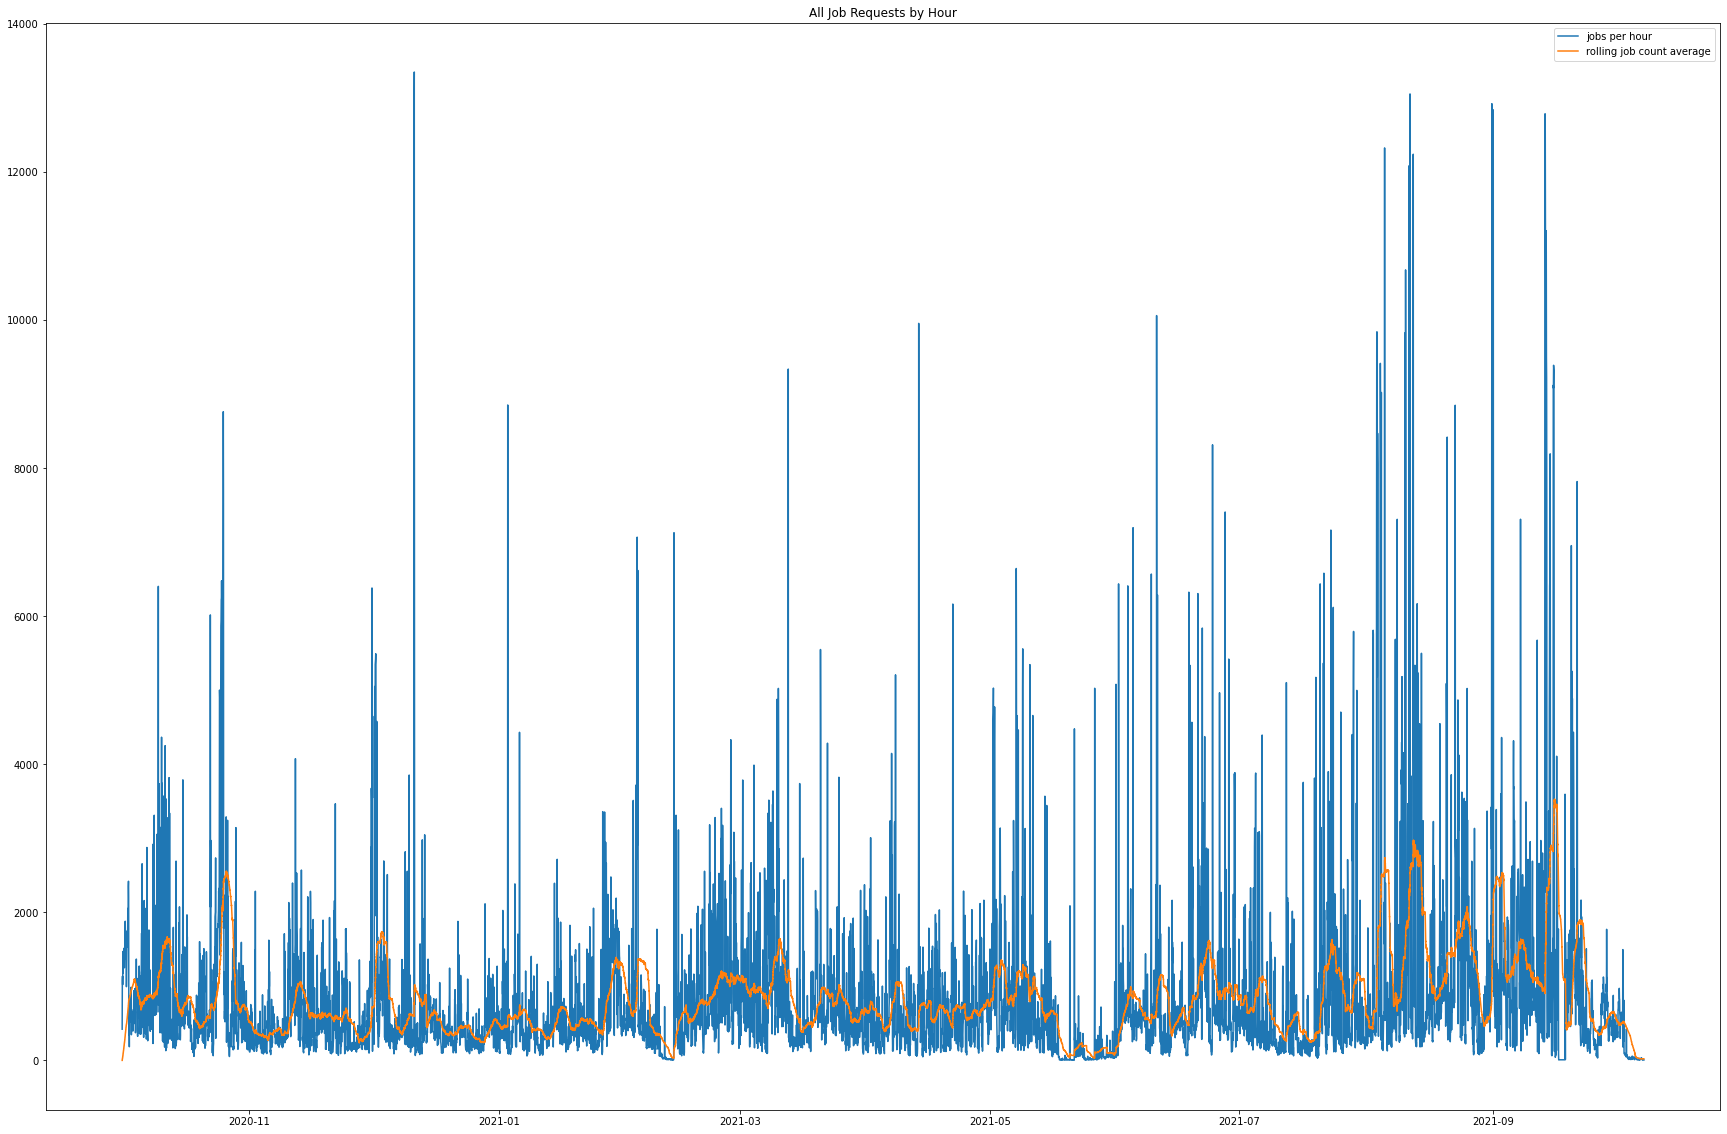

In [26]:
#Why is this happening
plt.subplots(figsize = (30,20))
plt.plot(jobs_count_per_hour2.index, jobs_count_per_hour2['JOBID'])
plt.plot(rolling_avg.index,rolling_avg['ROLL3DAY'])
plt.legend(['jobs per hour', 'rolling job count average'])
plt.title('All Job Requests by Hour')
#plt.hlines(jobs_count_per_hour2['jobid'].mean(),2020,2021, color = 'red');

In [27]:
fullsample_df

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,REQMEM_UNIT,BEGINHOUR,ENDHOUR
6640555,24460555,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:13,1024.0,1.5575,0 days 00:30:00,0 days 00:20:05,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00
6640560,24460560,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:17,1024.0,1.5575,0 days 00:30:00,0 days 00:20:09,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00
6640559,24460559,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:14,1024.0,1.5600,0 days 00:30:00,0 days 00:20:06,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00
6640558,24460558,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:14,1024.0,1.5575,0 days 00:30:00,0 days 00:20:06,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00
6640557,24460557,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:13,1024.0,1.5600,0 days 00:30:00,0 days 00:20:05,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927386,32923987,COMPLETED,2021-10-07 20:09:26,2021-10-07 20:11:21,2000.0,0.0900,2 days 00:00:00,0 days 00:01:55,1,1,sam,0:0,Mn,2021-10-07 20:00:00,2021-10-07 20:00:00
927387,32923988,COMPLETED,2021-10-07 20:15:05,2021-10-07 20:17:24,2000.0,0.0900,2 days 00:00:00,0 days 00:02:19,1,1,sam,0:0,Mn,2021-10-07 20:00:00,2021-10-07 20:00:00
927388,32923989,COMPLETED,2021-10-07 20:24:26,2021-10-07 20:26:01,2000.0,393.0700,2 days 00:00:00,0 days 00:01:35,1,1,sam,0:0,Mn,2021-10-07 20:00:00,2021-10-07 20:00:00
1491977,32923996,COMPLETED,2021-10-07 20:31:08,2021-10-07 20:32:45,2000.0,0.0900,2 days 00:00:00,0 days 00:01:37,1,1,sam,0:0,Mn,2021-10-07 20:00:00,2021-10-07 20:00:00


In [28]:
jobs_by_state = fullsample_df.groupby(['STATE','ENDHOUR'])['JOBID'].count()
jobs_by_state = pd.DataFrame(jobs_by_state)
jobs_by_state = jobs_by_state.reset_index()

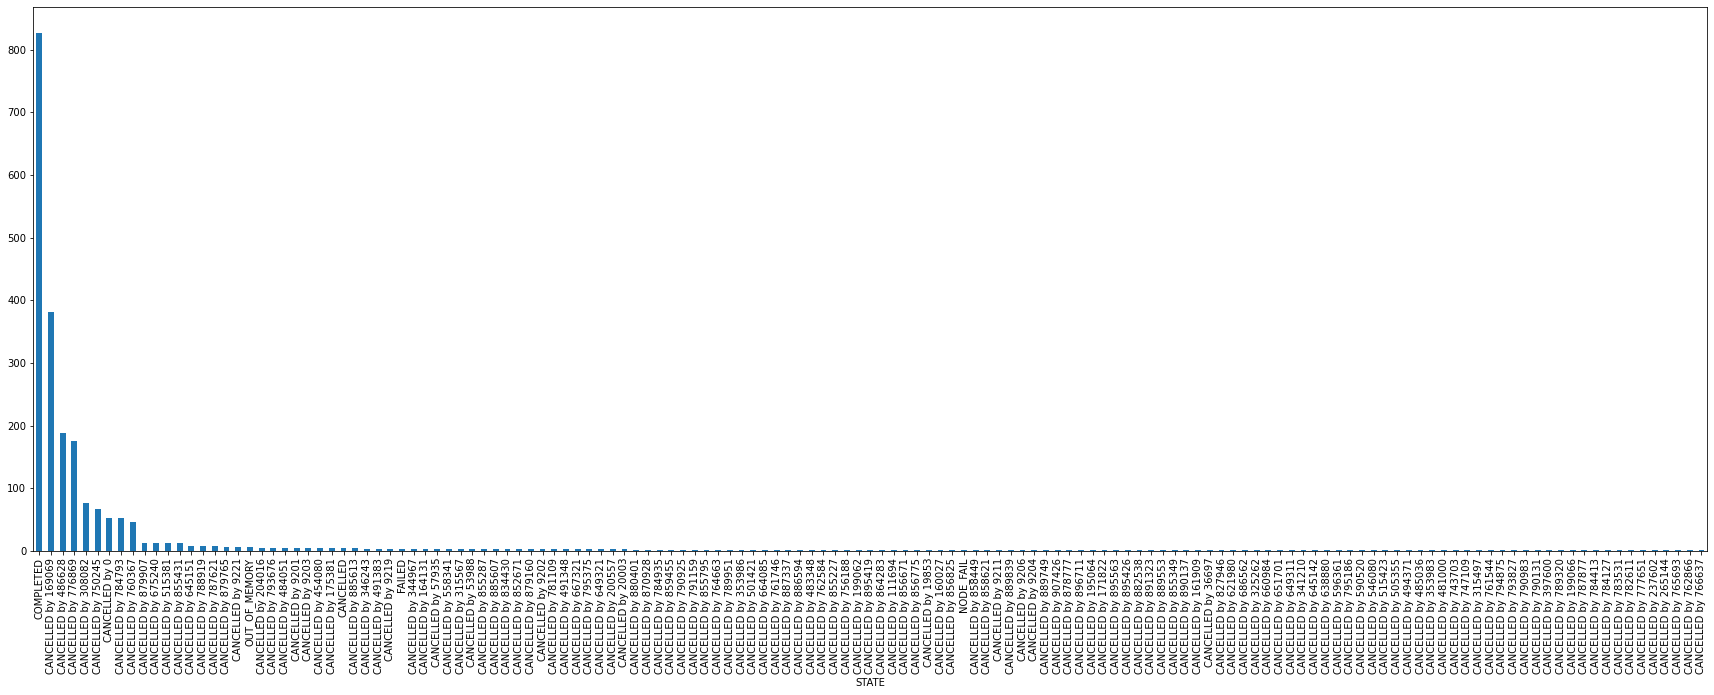

In [29]:

jobs_by_state.groupby('STATE')['JOBID'].mean().sort_values(ascending = False).plot(kind = 'bar', figsize = (30,10));

In [30]:
# The average is highest for jobs in the completed state

In [31]:

fullsample_df['WEEKNUMBER'] = fullsample_df['END'].dt.week

<ipython-input-31-a9d16809a956>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  fullsample_df['WEEKNUMBER'] = fullsample_df['END'].dt.week


In [32]:
fullsample_df.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,REQMEM_UNIT,BEGINHOUR,ENDHOUR,WEEKNUMBER
6640555,24460555,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:13,1024.0,1.5575,0 days 00:30:00,0 days 00:20:05,1,4,production,0:0,Mc,2020-10-01,2020-10-01,40
6640560,24460560,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:17,1024.0,1.5575,0 days 00:30:00,0 days 00:20:09,1,4,production,0:0,Mc,2020-10-01,2020-10-01,40
6640559,24460559,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:14,1024.0,1.5600,0 days 00:30:00,0 days 00:20:06,1,4,production,0:0,Mc,2020-10-01,2020-10-01,40
6640558,24460558,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:14,1024.0,1.5575,0 days 00:30:00,0 days 00:20:06,1,4,production,0:0,Mc,2020-10-01,2020-10-01,40
6640557,24460557,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:13,1024.0,1.5600,0 days 00:30:00,0 days 00:20:05,1,4,production,0:0,Mc,2020-10-01,2020-10-01,40


In [33]:
jobs_by_partition=pd.DataFrame(fullsample_df.groupby(['PARTITION','ENDHOUR'])['JOBID'].count())

In [34]:
jobs_by_partition = jobs_by_partition.reset_index()

<AxesSubplot:xlabel='PARTITION'>

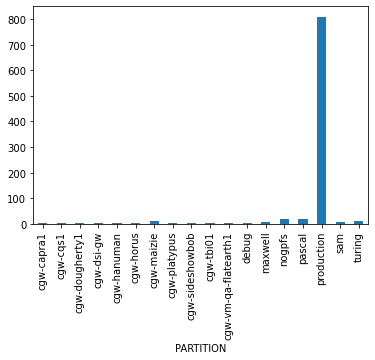

In [35]:
jobs_by_partition.groupby('PARTITION')['JOBID'].mean().plot(kind = 'bar')

In [36]:
jobs_by_partition.groupby('PARTITION')['JOBID'].mean()

PARTITION
cgw-capra1                1.233871
cgw-cqs1                  1.037037
cgw-dougherty1            1.262626
cgw-dsi-gw                1.572414
cgw-hanuman               1.500000
cgw-horus                 1.452381
cgw-maizie               10.796992
cgw-platypus              1.310105
cgw-sideshowbob           1.076923
cgw-tbi01                 1.166667
cgw-vm-qa-flatearth1      1.125000
debug                     3.026217
maxwell                   5.028087
nogpfs                   18.710268
pascal                   18.073047
production              810.056088
sam                       7.355865
turing                    9.972986
Name: JOBID, dtype: float64

In [37]:
#Production has the highest jobs per hour
#To work on: separating by week, loading in log data

In [38]:
slurm_wrapper_ce5 = pd.read_csv('slurm_wrapper_ce5.log',sep = ' - ', engine = 'python')

In [39]:
slurm_wrapper_ce6 = pd.read_csv('slurm_wrapper_ce6.log', sep = ' - ', engine = 'python')

In [40]:
fullsample_df.isna().sum()

JOBID          0
STATE          0
BEGIN          0
END            0
REQMEM         0
USEDMEM        0
REQTIME        0
USEDTIME       0
NODES          0
CPUS           0
PARTITION      0
EXITCODE       0
REQMEM_UNIT    0
BEGINHOUR      0
ENDHOUR        0
WEEKNUMBER     0
dtype: int64

In [41]:
fullsample_df

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,REQMEM_UNIT,BEGINHOUR,ENDHOUR,WEEKNUMBER
6640555,24460555,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:13,1024.0,1.5575,0 days 00:30:00,0 days 00:20:05,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00,40
6640560,24460560,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:17,1024.0,1.5575,0 days 00:30:00,0 days 00:20:09,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00,40
6640559,24460559,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:14,1024.0,1.5600,0 days 00:30:00,0 days 00:20:06,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00,40
6640558,24460558,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:14,1024.0,1.5575,0 days 00:30:00,0 days 00:20:06,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00,40
6640557,24460557,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:13,1024.0,1.5600,0 days 00:30:00,0 days 00:20:05,1,4,production,0:0,Mc,2020-10-01 00:00:00,2020-10-01 00:00:00,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927386,32923987,COMPLETED,2021-10-07 20:09:26,2021-10-07 20:11:21,2000.0,0.0900,2 days 00:00:00,0 days 00:01:55,1,1,sam,0:0,Mn,2021-10-07 20:00:00,2021-10-07 20:00:00,40
927387,32923988,COMPLETED,2021-10-07 20:15:05,2021-10-07 20:17:24,2000.0,0.0900,2 days 00:00:00,0 days 00:02:19,1,1,sam,0:0,Mn,2021-10-07 20:00:00,2021-10-07 20:00:00,40
927388,32923989,COMPLETED,2021-10-07 20:24:26,2021-10-07 20:26:01,2000.0,393.0700,2 days 00:00:00,0 days 00:01:35,1,1,sam,0:0,Mn,2021-10-07 20:00:00,2021-10-07 20:00:00,40
1491977,32923996,COMPLETED,2021-10-07 20:31:08,2021-10-07 20:32:45,2000.0,0.0900,2 days 00:00:00,0 days 00:01:37,1,1,sam,0:0,Mn,2021-10-07 20:00:00,2021-10-07 20:00:00,40


In [42]:
fullsample_df['EXITCODE'].unique()

array(['0:0', '0:9', '2:0', '0:125', '1:0', '0:6', '0:15', '13:0',
       '127:0', '126:0', '38:0', '6:0', '0:7', '29:0', '0:11', '0:12',
       '7:0', '85:0', '8:0', '116:0', '16:0', '28:0', '0:98', '9:0',
       '24:0', '30:0', '0:40', '0:105', '76:0', '59:0', '121:0', '0:8',
       '11:0', '103:0', '43:0', '67:0', '125:0', '3:0', '4:0', '0:2'],
      dtype=object)

In [43]:
jobs_failed_per_hour = pd.DataFrame(fullsample_df[fullsample_df['STATE'] != 'COMPLETED'].groupby('ENDHOUR')['JOBID'].count())

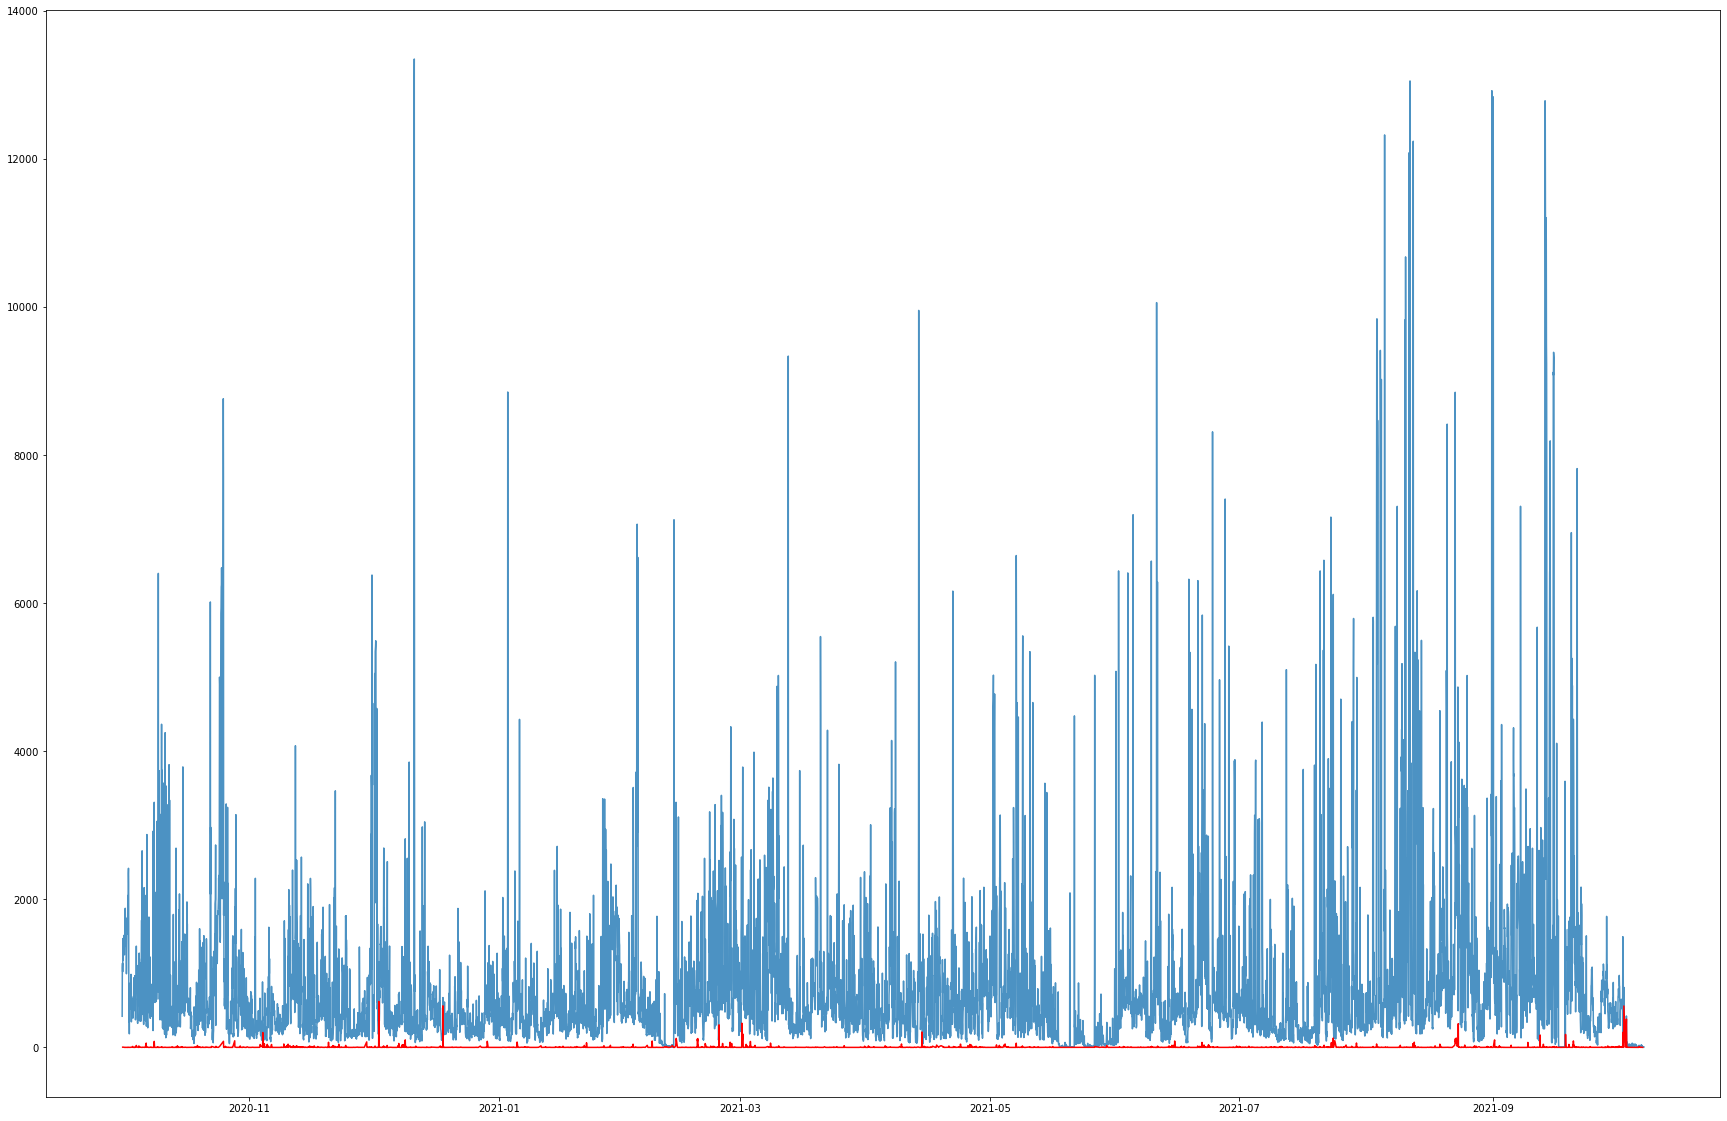

In [44]:
plt.subplots(figsize = (30,20))
plt.plot(jobs_count_per_hour2.index, jobs_count_per_hour2['JOBID'], alpha = 0.8)
plt.plot(jobs_failed_per_hour.index, jobs_failed_per_hour['JOBID'],color = 'red')

In [45]:
jobs_completed_per_hour =pd.DataFrame(fullsample_df[fullsample_df['STATE'] == 'COMPLETED'].groupby('ENDHOUR')['JOBID'].count())

In [46]:
jobs_failed_per_hour.rename(columns = {'JOBID':'JOBSFAILED'})
jobs_failed_and_count = jobs_completed_per_hour.merge(jobs_failed_per_hour, on = 'ENDHOUR')

In [47]:
jobs_failed_and_count

,JOBID_x,JOBID_y
ENDHOUR,,
2020-10-01 03:00:00,1018,4
2020-10-01 08:00:00,1257,4
2020-10-01 13:00:00,1249,1
2020-10-01 14:00:00,1408,2
2020-10-01 16:00:00,1782,1
...,...,...
2021-10-07 05:00:00,24,1
2021-10-07 06:00:00,30,2
2021-10-07 07:00:00,22,4


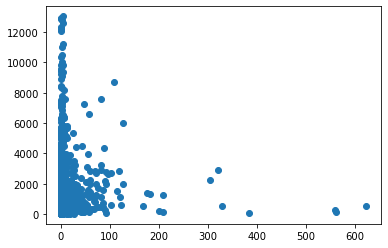

In [48]:
plt.scatter(jobs_failed_and_count['JOBID_y'], jobs_failed_and_count['JOBID_x'])

In [49]:
jobs_failed_and_count['PERCENTAGEFAILED']=jobs_failed_and_count['JOBID_y']/jobs_failed_and_count['JOBID_x']

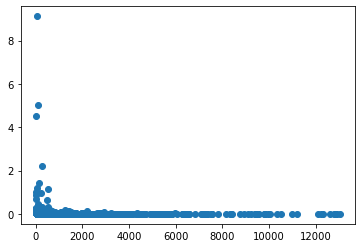

In [50]:
plt.scatter(jobs_failed_and_count['JOBID_x'], jobs_failed_and_count['PERCENTAGEFAILED'])

In [51]:
# LOOK AT DAYS WITH HIGH NUMBER OF FAILURES:
jobs_failed_and_count['JOBID_y'].mean()

5.671263720799325

In [52]:
dates_with_high_failures = list(jobs_failed_and_count[jobs_failed_and_count['JOBID_y'] >=5].index)
dates_with_high_failures = pd.to_datetime(dates_with_high_failures)


In [53]:
fullsample_df[(fullsample_df['ENDHOUR'].isin(dates_with_high_failures)) & (fullsample_df['REQMEM'] != np.inf)]['REQMEM'].mean()

6714.092349711521

In [55]:
fullsample_df[(fullsample_df['ENDHOUR'].isin(dates_with_high_failures) == False)&(fullsample_df['REQMEM'] != np.inf)]['REQMEM'].mean()

6604.646282694381

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabel'

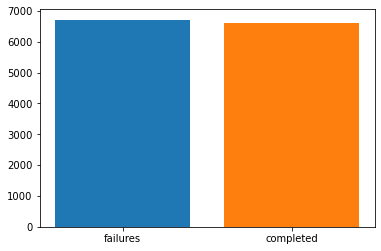

In [60]:
plt.bar('failures',fullsample_df[(fullsample_df['ENDHOUR'].isin(dates_with_high_failures)) & (fullsample_df['REQMEM'] != np.inf)]['REQMEM'].mean())
plt.bar('completed',fullsample_df[(fullsample_df['ENDHOUR'].isin(dates_with_high_failures) == False)&(fullsample_df['REQMEM'] != np.inf)]['REQMEM'].mean())
plt.set_ylabel('Requested Memory')